```
Each move, the crab does the following actions:

    The crab picks up the three cups that are immediately clockwise of the current cup. They are removed from the circle; cup spacing is adjusted as necessary to maintain the circle.
    The crab selects a destination cup: the cup with a label equal to the current cup's label minus one. If this would select one of the cups that was just picked up, the crab will keep subtracting one until it finds a cup that wasn't just picked up. If at any point in this process the value goes below the lowest value on any cup's label, it wraps around to the highest value on any cup's label instead.
    The crab places the cups it just picked up so that they are immediately clockwise of the destination cup. They keep the same order as when they were picked up.
    The crab selects a new current cup: the cup which is immediately clockwise of the current cup.
```

In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [61]:
class CupRing():
    def __init__(self, numstr, expand=0, verbose=False):
        self.nums = []
        for c in numstr.strip():
            self.nums.append(int(c))
        for c in range(len(self.nums)+1, expand+1):
            self.nums.append(c)
        self.pos = 0
        self.vpos = self.nums[self.pos]
        self.original = self.nums[:]
        self.round = 1
        self.verbose = verbose
        
    def nth(self, n):
        if self.verbose: print('...', n)
        if n >= len(self.nums):
            n -= len(self.nums)
        val = self.nums[n]
        self.nums.remove(val)
        if self.pos == len(self.nums):
            self.pos = len(self.nums)-1
        return val
    
    def incpos(self):
        self.pos += 1
        if self.pos >= len(self.nums):
            self.pos = 0
        self.vpos = self.nums[self.pos]
        
    def pick_up(self):
        hand = [
            self.nth(self.pos+1),
            self.nth(self.pos+1),
            self.nth(self.pos+1),
        ]
        return hand
    
    def reinsert(self, hand):
        destination_ix = -1
        destination_no = self.vpos-1
        while destination_ix < 0:
            if not destination_no in self.original:
                destination_no = max(self.original)
            try:
                destination_ix = self.nums.index(destination_no) + 1
            except ValueError:
                destination_no -= 1
        for i in range(3):
            self.nums.insert(destination_ix+i, hand[i])
        self.pos = self.nums.index(self.vpos)
        return destination_no
            
    def play_round(self):
        if self.verbose: 
            print('-- move {} --'.format(self.round))
            print('cups: ', end='')
            for i in range(len(self.nums)):
                if i == self.pos:
                    print('({}) '.format(self.nums[i]), end='')
                else:
                    print('{} '.format(self.nums[i]), end='')
            print()
        hand = self.pick_up()
        if self.verbose: print('pick up: {}'.format(hand))
        dest = self.reinsert(hand)
        if self.verbose: print('destination: {}'.format(dest))
        self.incpos()
        self.round += 1
        
    def play_n_rounds(self,n):
        for i in range(n):
            self.play_round()
        rotated = self.nums[self.nums.index(1)+1:] + self.nums[:self.nums.index(1)]
        if self.verbose: print(' '.join([str(x) for x in rotated]))
        return rotated[0]*rotated[1]

In [62]:
test_ring = CupRing("942387615", expand=100)
# test_ring = CupRing("389125467", expand=100)
test_ring.play_n_rounds(100)

506

In [80]:
r = []
res = []
N = 100
skip = max([1,N//100])
for N in range(1,1000):
    for i in range(1,N+1,skip):
        test_ring2 = CupRing("942387615", expand=N//10, verbose=False)
        res.append(test_ring2.play_n_rounds(i))
    r.append(res)
    print('N: {}'.format(N))
plt.figure(1)
plt.imshow(r)
plt.show()

N: 1
N: 2
N: 3
N: 4
N: 5
N: 6
N: 7
N: 8
N: 9
N: 10
N: 11
N: 12
N: 13
N: 14
N: 15
N: 16
N: 17
N: 18
N: 19
N: 20
N: 21
N: 22
N: 23
N: 24
N: 25
N: 26
N: 27
N: 28
N: 29
N: 30
N: 31
N: 32
N: 33
N: 34
N: 35
N: 36
N: 37
N: 38
N: 39
N: 40
N: 41
N: 42
N: 43
N: 44
N: 45
N: 46
N: 47
N: 48
N: 49
N: 50
N: 51
N: 52
N: 53
N: 54
N: 55
N: 56
N: 57
N: 58
N: 59
N: 60
N: 61
N: 62
N: 63
N: 64
N: 65
N: 66
N: 67
N: 68
N: 69
N: 70
N: 71
N: 72
N: 73
N: 74
N: 75
N: 76
N: 77
N: 78
N: 79
N: 80
N: 81
N: 82
N: 83
N: 84
N: 85
N: 86
N: 87
N: 88
N: 89
N: 90
N: 91
N: 92
N: 93
N: 94
N: 95
N: 96
N: 97
N: 98
N: 99
N: 100
N: 101
N: 102
N: 103
N: 104
N: 105
N: 106
N: 107
N: 108
N: 109
N: 110
N: 111
N: 112
N: 113
N: 114
N: 115
N: 116
N: 117
N: 118
N: 119
N: 120
N: 121
N: 122
N: 123
N: 124
N: 125
N: 126
N: 127
N: 128
N: 129
N: 130
N: 131
N: 132
N: 133
N: 134
N: 135
N: 136
N: 137
N: 138
N: 139
N: 140
N: 141
N: 142
N: 143
N: 144
N: 145
N: 146
N: 147
N: 148
N: 149
N: 150
N: 151
N: 152
N: 153
N: 154
N: 155
N: 156
N: 157
N: 158
N:

<IPython.core.display.Javascript object>

TypeError: Invalid dimensions for image data

<IPython.core.display.Javascript object>


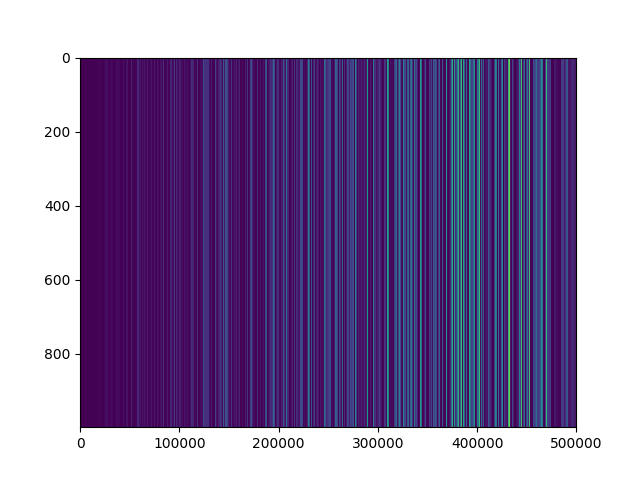

In [87]:
plt.figure(2)
plt.imshow(np.array(r), aspect='auto') 
plt.show()

In [86]:
len(r), len(r[0]), len(r[-1])

(999, 499500, 499500)